Note:

This is a reference code you can use to support your coding. This contains more comments that the "live code".

# Load libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn

%matplotlib notebook

# Load dataset

In [2]:
# transform:
# 1) to tensors
# 2) normalizeation from [0,1] to [-1, 1]
transform = transforms.Compose([
    
    # to tensor
    transforms.ToTensor(),
    
    # normalize
    # means, stds
    # (mean 1, mean 2, mean 3), (std 1, std 2, std 3)
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    
])

In [3]:
# define batch size
batch_size = 128


# load dataset using torchvision train
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=transform,
)

# create dataloader
# this allows us to work with batches
trainLoader = torch.utils.data.DataLoader(
    trainset, 
    batch_size = batch_size,
    # set to ``True`` to have the data reshuffled at every epoch (default: ``False``).
    shuffle = True,
    num_workers = 2   
)


# SHOW THIS FIRST AND THEN COMMENT IT

# show how the batch works
# for batchData in trainLoader:
    
#     # tuple: (batchDaa, labels)
#     print(len(batchData))
    
#     # [batch size, channels, height, width]
#     print(batchData[0].shape)



# load valid and test data
testValidSet = torchvision.datasets.CIFAR10(
    root = "./data",
    train = False,
    download = True,
    transform = transform,
)


# split dataset
validSet, testSet = torch.utils.data.random_split(testValidSet, [5000, 5000])


# create valid dataloader
validLoader = torch.utils.data.DataLoader(
    validSet, 
    batch_size=batch_size,
    shuffle=False, 
    num_workers=2,
)

# create test dataloader
testLoader = torch.utils.data.DataLoader(
    testSet, 
#     batch_size=batch_size,
    shuffle=False, 
    num_workers=2,
)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# define classes
classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",  
)

# Visualize data

In [5]:
# function to show image
# input image: tensor: [channels, height, width]
def imgShow(img):
    
    # unnormalize
    # from [-1, 1] to [0, 1]
    img = img / 2 + 0.5 
    
    imgNumpy = img.numpy()
    
    #create plot
    # transpose image to [height, width, channels] from [channels, height, width]
    plt.imshow(np.transpose(imgNumpy, (1, 2, 0)))
    
    # display plot
    plt.show()

<IPython.core.display.Javascript object>


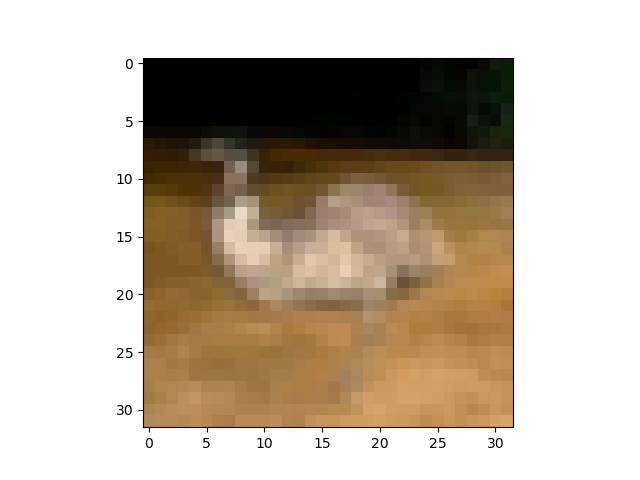

bird


In [6]:
# get random samples

# call iter method on iterable
dataIter = iter(trainLoader)

# get first item on iterable
images, labels = dataIter.next()

# select image to display
imageIdx = 0

# show images
imgShow(images[imageIdx])
print(classes[labels[imageIdx]])

# Define CNN model

In [7]:
# create class
# it requires:
# 1) init method: to define layers
# 2) forward: to define how data flows into the model
class CNN(nn.Module):
    
    # define init method
    # define layers
    def __init__(self, hiddenLayer = 100):
        
        # load initial from paertns
        super().__init__()
        
        # conv 1
        # input channels, output channels, kernel size
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # pooling
        # kernel size, stride
        self.pool = nn.MaxPool2d(2, 2)
        
        # fc1
        # check input dim with print shape trick
        # output = num classes
        # teach trick to check shape of nn (printing shape of data output)
        self.fc1 = nn.Linear(6*14*14, hiddenLayer)
        
#         # THIS ADD LATER
#         # fc2
#         # check input dim with print shape trick
#         # output = num classes
#         # teach trick to check shape of nn (printing shape of data output)
#         self.fc2 = nn.Linear(hiddenLayer, hiddenLayer)
        
        # output layer
        # hidden dim, # classes
        self.out = nn.Linear(hiddenLayer, 10)
        
        
        # act
        self.act = nn.ReLU()
        
        
    # forward: to define how information flows in the data
    # input data: [batch size, channels, height, width]
    def forward(self, x):
        
        # check shapes
        # teach trick to check shape of nn (printing shape of data output)
#         print(x.shape)
        
        # conv 1
        x = self.act(self.conv1(x))
        
#         print(x.shape)
        
        # pooling conv 1
        x = self.pool(x)
        
#         print(x.shape)
        
        
        # flatten layer
        # (batch size, multiplication of dimensions)
        x = x.view(-1, 6*14*14)
        
#         print(x.shape)
        
        
        # fc1 
        x = self.act(self.fc1(x))
        
        
#         # THIS ADD LATER
#         x = self.act(self.fc2(x))
        
        # output
        x = self.out(x)
        
#         print(x.shape)
        
        return x

In [8]:
# define model
model = CNN()

In [9]:
# test nn dimensions in forward method

# call iter method on iterable
dataIter = iter(trainLoader)

# get first item on iterable
images, labels = dataIter.next()

# pass data through cnn
test = model.forward(images)

# Define cost function and optimizer

In [10]:
# cost function
costFunction = nn.CrossEntropyLoss()

# optimizer (to update parameters
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Train network

<IPython.core.display.Javascript object>


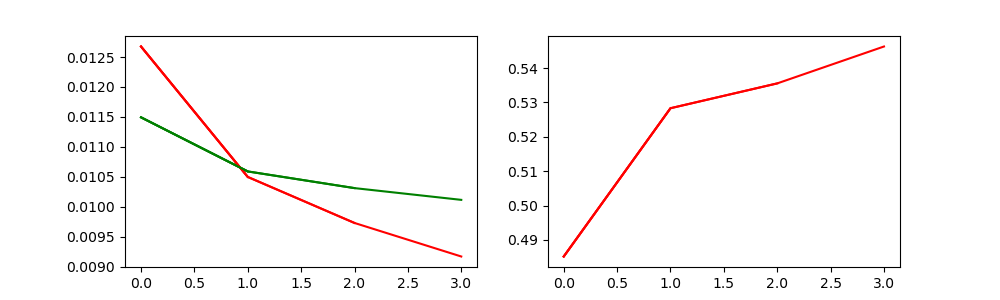

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4


In [11]:
# define epochs
# do these cases:
# 1) 5 because it gets errors so I can show the usefull of confusion matrix and classification report
# 2) 10 is better and still has some errors
epochs = 5

# cost values (losses)
trainLoss = np.zeros(shape = (epochs))
validLoss = np.zeros(shape = (epochs))

# metric value
# accuracy
validAcc = np.zeros(shape = (epochs))

# plot to display training online
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

# train in each epoch
for i in range(epochs):
    
    print(f"epoch {i}")
    
    # epoch train loss
    epoch_train_loss = 0
    
    # Use train dataset
    for tmp in trainLoader:
        
        # get data
        data = tmp[0]
        
        # get labels
        labels = tmp[1]
        
        # 1
        # get model predictions
        predictions = model.forward(data)

        # 2
        # get cost function value (loss)
        loss = costFunction(predictions, labels)

        # gradients to zero.
        # this is because pytorch accumulates the gradientes in each call to backward() function (next function to use)
        optimizer.zero_grad()

        # 3
        # do backprogagation 
        # it is to get the gradient values of loss function wrt each model parameter
        loss.backward()


        # 4
        # update parameters
        # use the update formular or algorithm to update the models parameters using the gradient values obtained by backpropagation algorithm
        optimizer.step()

        # sum of error 
        epoch_train_loss += loss.item() 
    
    # add loss value to array
    # epoch loss / train size
    trainLoss[i] = epoch_train_loss / 50000
    
    
    
    
    # validation dataset
    
    # error value
    epoch_valid_loss = 0
    
    # check f1 score in each minibatch
    metricVal = 0
    
    # batch counter (to get mean of metric)
    batchCounter = 0
    
    # Use train dataset
    for tmp in validLoader:
        
        # get data
        dataVal = tmp[0]
        
        # get labels
        labelsVal = tmp[1]
        
    
        # this is just to check the training, no to update parameters
        predictionsVal = model.forward(dataVal)

        # val loss
        lossVal = costFunction(predictionsVal, labelsVal)

        # sum of error 
        epoch_valid_loss += lossVal.item() 
        
        # get metric value
        metricVal += accuracy_score(

            # true values
            labelsVal.detach().numpy(),

            # predicted values
            torch.argmax(predictionsVal, 1).detach().numpy(),

        )
        
        batchCounter += 1
        
    # add loss value to array
    # epoch loss / valid size
    validLoss[i] = epoch_valid_loss / 5000

    # store metric score
    # metric epoch / number of epochs
    validAcc[i] = metricVal / batchCounter
    
    
    
    
    # plot loss values
    
    # add train
    ax[0].plot(trainLoss[0: i], c = "red")
    # add valid
    ax[0].plot(validLoss[0: i], c = "green")
    
    
    # plot metric values
    ax[1].plot(validAcc[0: i], c = "red")
    
    # plot
    fig.canvas.draw()

# Analize on test dataset (unseen data)

In [12]:
# array to store predictions
predictions = np.zeros(shape = (5000))

# labels
labels = np.zeros(shape = 5000)

# Use test dataset
for idx, tmp in enumerate(testLoader):

    # get data
    dataTest = tmp[0]

    # get labels
    labels[idx] = tmp[1]

    # get predictions
    predictionsTest = model.forward(dataTest)
    
    # save predictions
#     predictions.append(torch.argmax(predictionsTest, 1).detach().numpy())
    predictions[idx] = torch.argmax(predictionsTest, 1).detach().numpy()

<IPython.core.display.Javascript object>


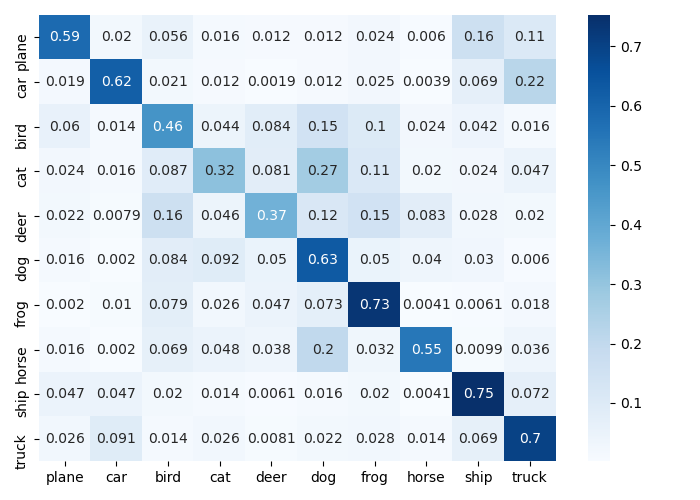

<AxesSubplot:>

In [13]:
# get confussion matrix
cm = confusion_matrix(
    
    # labels
    labels, 
    
    # predictions
    predictions, 
    
#     normalize = None,
    normalize = "true"
    
)

# print(f"class 0: {rFResultsCM[0, :]}")

fig0, ax = plt.subplots(figsize = (7,5), tight_layout = True)

# plot
sn.heatmap(
    
    # confusion matrix  values
    cm, 
    
    # add values to each element in matrix
    annot=True, 
    
    # add labesl to axis
    yticklabels = [x for x in classes],
    xticklabels = [x for x in classes],
    
    # blue scale
    cmap = plt.cm.Blues,
)

In [14]:
# get classification report
print(
    classification_report(
        labels, 
        predictions
    )
)

              precision    recall  f1-score   support

         0.0       0.72      0.59      0.64       504
         1.0       0.75      0.62      0.68       518
         2.0       0.44      0.46      0.45       499
         3.0       0.49      0.32      0.38       492
         4.0       0.53      0.37      0.44       505
         5.0       0.42      0.63      0.50       500
         6.0       0.57      0.73      0.64       492
         7.0       0.73      0.55      0.63       505
         8.0       0.62      0.75      0.68       489
         9.0       0.56      0.70      0.62       496

    accuracy                           0.57      5000
   macro avg       0.58      0.57      0.57      5000
weighted avg       0.58      0.57      0.57      5000

